# Manipulación y Procesamiento Básico

En esta clase veremos una introducción al manejo y procesamiento de imágenes, explicaremos
los paquetes principales de Python que necesitarán para leer imágenes, convertir y escalar imágenes, guardar resultados, etc. 

## 1. PIL – The Python Imaging Library

La biblioteca de imágenes de Python (PIL) permine manejar imágenes de manera general.
Proporciona muchas funciones útiles para realizar operaciones básicas como cambio de tamaño, 
recortar, rotación, conversión de color y mucho más. 

Con PIL  se puede leer imágenes de la mayoría de los formatos y escribir los más comunes. 

El módulo más importante es el módulo de Image.

In [1]:
#Importando la libreria PIL
from PIL import Image


In [2]:
#Abrir una imagen
pil_im = Image.open('data/empire.jpg')
pil_im.show()

In [3]:
#Convertirla a escala de grises
pil_im_grey = Image.open('data/empire.jpg').convert('L')
pil_im_grey.show()

In [4]:
#Obtener una lista de las imagenes .png dentro de un directorio
import os

def get_imlist(path):
    """ Returns a list of filenames for all png images in a directory. """
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.png')]


filelist=get_imlist('/Users/daniela/Desktop/CV/data/')
filelist

['/Users/daniela/Desktop/CV/data/houses.png',
 '/Users/daniela/Desktop/CV/data/ceramic-houses_t0.png',
 '/Users/daniela/Desktop/CV/data/CV1.png',
 '/Users/daniela/Desktop/CV/data/flower32_t0.png']

In [5]:
#Convertir la lista de imagenes png. a jpg.

for infile in filelist:
    outfile = os.path.splitext(infile)[0] + ".jpg"
    if infile != outfile:
        try:
            print('Processing' , infile)
            Image.open(infile).convert('RGB').save(outfile)
            
        except IOError:
            print ('Cannot convert', infile)

Processing /Users/daniela/Desktop/CV/data/houses.png
Processing /Users/daniela/Desktop/CV/data/ceramic-houses_t0.png
Processing /Users/daniela/Desktop/CV/data/CV1.png
Processing /Users/daniela/Desktop/CV/data/flower32_t0.png


In [6]:
#Cortar
box = (100,100,400,400)
region = pil_im.crop(box)
region.show()


In [7]:
#Pegar
region = region.transpose(Image.ROTATE_180)
pil_im.paste(region,box)
pil_im.show()

In [8]:
#Cambiar tamaño
pil_im = Image.open('data/empire.jpg')
out = pil_im.resize((128,128))
out.show()

In [9]:
#Rotar 45 grados
out = pil_im.rotate(45)
out.show()

## 2. MATPLOTLIB

Cuando queremos trabajar con matemáticas, dibujar puntos, líneas y
curvas en las imágenes o crear gráficos, Matplotlib es una buena opción. 
Matplotlib tiene herramientas más poderosas que las disponible en PIL.

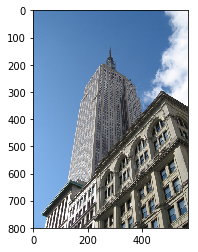

In [37]:
from PIL import Image
from pylab import *

# Leer la imagen
im = array(Image.open('data/empire.jpg'))

# Desplegar la imagen
imshow(im)

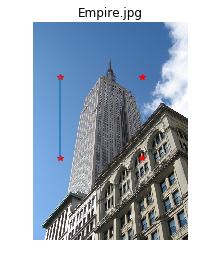

In [38]:
# Algunos puntos

imshow(im)

x = [100,100,400,400]
y = [200,500,200,500]

# Marcar los puntos en la imagen

plot(x,y,'r*')

# Dibujar una linea que una dos puntos

plot(x[:2],y[:2])

# Anadir titulo y mostrar el grafico
title('Empire.jpg')

#Ocultar los ejes
axis('off')

#Desplegar la imagen
show()

### Opciones

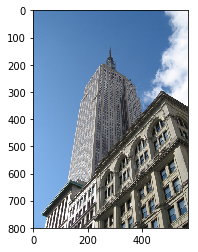

In [12]:
imshow(im)
#plot(x,y) # Default linea solida azul
#plot(x,y,'r*') # Estrellas rojas
#plot(x,y,'go-') # Linea verde con circulos
#plot(x,y,'ks:') # Linea negra punteada con marcadores negros

### Contorno

(0.5, 568.5, 0.5, 799.5)

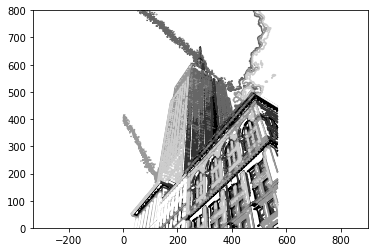

In [13]:
##Contorno
from pylab import *
# Leer imagen
im_grey = array(Image.open('data/empire.jpg').convert('L'))
# Crear una nueva figura
figure()
# No usar colores
gray()
# Mostrar contornos
contour(im_grey, origin='image')
axis('equal')

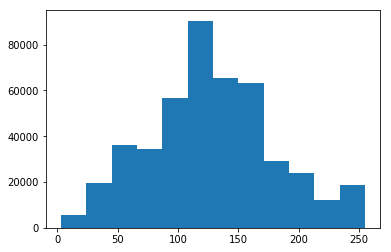

In [14]:
#Histograma
#flatten() transforma un arreglo multidimensional en un arreglo unidimensional

hist(im_grey.flatten(),12)
show()

## 3. NUMPY

NumPy (http://www.scipy.org/NumPy/) es un paquete popularmente 
utilizado en ciencias y lo usaremos en casi todos los ejercicios a lo largo 
de este curso.  NumPy nos permite representar vectores, 
matrices, imágenes y mucho más.

Con Numpy podemos realizar multiplicación de matrices,
transposición, resolución de sistemas de ecuaciones, multiplicación de vectores 
y normalización, que se necesitan para hacer cosas como alinear imágenes, deformar imágenes, 
modelar variaciones, clasificar imágenes, agrupar imágenes, etc.

In [15]:
im = array(Image.open('data/empire.jpg'))
print (im.shape, im.dtype)

im_grey = array(Image.open('data/empire.jpg').convert('L'),'f')
print (im_grey.shape, im_grey.dtype)

(800, 569, 3) uint8
(800, 569) float32


La primera tupla de cada linea es el tamaño del arreglo (filas, columnas, canales), 
y el siguiente string es el tipo de dato del arreglo. Las imagenes rgb son usualmente 
codificadas con enteros (uint8), que es el tipo que aparece en el primer output. 
El tipo para el segundo output es float32 ya que la imagen fue convertida 
a escala de grises.

In [16]:
#Accediendo a elementos en el arreglo.
value= im[1,1,1]
value

133

### Múltiples Elementos

Podemos retornar una vista de un arreglo especifico por intevalos.

In [17]:
#im_grey[i,:] = im_grey[j,:] # Asignar los valores de la fila j a los valores de la fila i
#im_grey[:,i] = 100 # Asignar 100 a todos los valores de la columna i
im_grey[:100,:50].sum() # La suma de los valores de las primeras 100 filas y 50 columnas
im_grey[50:100,50:100] # rows 50-100, columns 50-100 (100th no incluido)
#im_grey[i].mean() # Promediar la fila i
#im_grey[:,-1] # Ultima columna
#im_grey[-2,:] (or im[-2]) # Penúltima fila

array([[126., 126., 127., ..., 122., 123., 123.],
       [128., 128., 128., ..., 124., 124., 124.],
       [128., 128., 128., ..., 124., 124., 124.],
       ...,
       [133., 133., 132., ..., 129., 129., 128.],
       [132., 133., 133., ..., 129., 129., 128.],
       [133., 133., 133., ..., 128., 128., 128.]], dtype=float32)

## Separando una Imagen en Tres Canales

Image size: 400 x 232


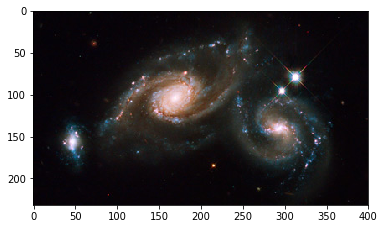

In [18]:
image = Image.open('data/Hs-2009-14-a-web.jpg')
xsize, ysize = image.size
print("Image size: {} x {}".format(xsize, ysize))
imshow(image)

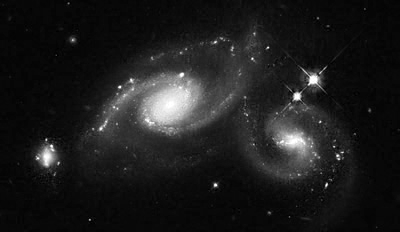

In [19]:
#Separando
r, g, b = image.split()
r

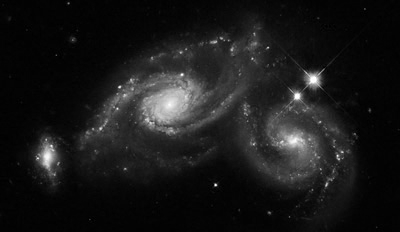

In [20]:
g

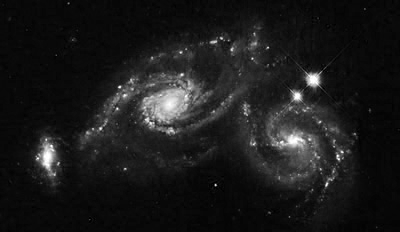

In [21]:
b

In [22]:
r_data = np.array(r.getdata()) # data is now an array of length ysize*xsize
g_data = np.array(g.getdata())
b_data = np.array(b.getdata())
r_data

array([6, 4, 6, ..., 5, 5, 5])

In [23]:
#Redimencionando el arreglo (2 dimensiones)
r_data = r_data.reshape(ysize, xsize)
g_data = g_data.reshape(ysize, xsize)
b_data = b_data.reshape(ysize, xsize)
r_data

array([[6, 4, 6, ..., 4, 4, 4],
       [5, 6, 6, ..., 5, 5, 5],
       [8, 8, 6, ..., 5, 6, 6],
       ...,
       [8, 8, 8, ..., 5, 6, 6],
       [8, 8, 8, ..., 5, 5, 6],
       [8, 8, 8, ..., 5, 5, 5]])

### Transformación a Escala de Grises

3 255
0 252
101 200
0 255


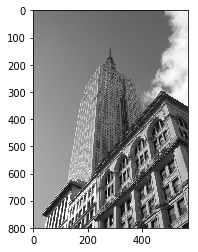

In [24]:
from PIL import Image
from numpy import *

im = array(Image.open('data/empire.jpg').convert('L'))

im2 = 255 - im #Invertir imagen
im3 = (100.0/255) * im + 100 #Restringir a valores entre 100 y 200
im4 = 255.0 * (im/255.0)**2 #Squared

print(int(im.min()), int(im.max()))
print(int(im2.min()), int(im2.max()))
print(int(im3.min()), int(im3.max()))
print(int(im4.min()), int(im4.max()))

imshow(im)


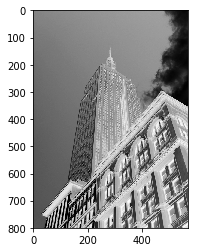

In [25]:
imshow(im2)

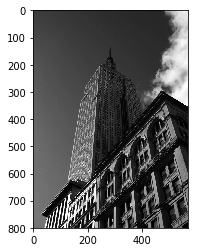

In [26]:
imshow(im4)

### Promediando Imágenes

Promediar imágenes es una forma simple de reducir el ruido de la imagen y también se usa a menudo para efectos artísticos. 
Calcular una imagen promedio de una lista de imágenes no es difícil.

In [27]:
def compute_average(imlist):
    print("Compute the average of a list of images.")
    
    # Open first image and make into array of type float
    averageim = array(Image.open(imlist[0]), 'f')
    for imname in imlist[1:]:
        try:
            averageim += array(Image.open(imname))
        except:
            print (imname + '...skipped')
    averageim /= len(imlist)
    # Return average as uint8
    return array(averageim, 'uint8')

### Imágenes Borrosas

Un ejemplo clásico y muy útil de convolución de imágenes es el desenfoque Gaussiano de imágenes.
En esencia, la imagen I se convoluciona con una gaussiana para crear una
imagen borrosa.

\begin{equation*}
I_{G} = I*G_{\sigma}
\end{equation*}

Donde


\begin{equation*}
G_{\sigma} = {{1\over{2\pi\sigma}}\exp^{-(x^2+y^2)/2\sigma^2}}
\end{equation*}

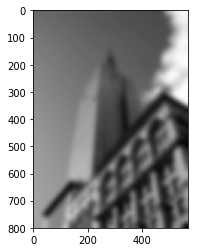

In [28]:
from PIL import Image
from numpy import *
from scipy.ndimage import filters
from pylab import *


im = array(Image.open('data/empire.jpg').convert('L'))

im2 = filters.gaussian_filter(im,9)

imshow(im2)

El ultimo parámetro de gaussian_filter() es la desviación estandar.

## 4. SCIPY
SciPy (http://scipy.org/) es un paquete de código abierto de matemáticas que se basa en NumPy 
y proporciona rutinas eficientes para una serie de operaciones, incluyendo integración numérica, 
optimización, estadísticas, el procesamiento de señales y, lo más importante, para nosotros, 
procesamiento de imágenes. Como se mostrará a continuación, hay muchos módulos útiles en SciPy. 

## De-noising

De-noising es proceso de eliminar el ruido de una imagen intentando preservar detalles y 
estructuras. En este ejemplo utilizaremos el modelo de eliminación de ruido de Rudin-Osher-Fatemi
(ROF). Eliminar el ruido de las imágenes se utiliza para diversos fines, desde los esteticos
para que las fotos de nuestras vacaciones se vean hasta la mejora de calidad de imágenes 
tomadas por un satélite.

In [29]:
from numpy import *

def denoise(im,U_init,tolerance=0.1,tau=0.125,tv_weight=100):

    """An implementation of the Rudin-Osher-Fatemi (ROF) denoising model
    using the numerical procedure presented in eq (11) A. Chambolle (2005).
    Input: noisy input image (grayscale), initial guess for U, weight of
    the TV-regularizing term, steplength, tolerance for stop criterion.
    Output: denoised and detextured image, texture residual. """
    
    m,n = im.shape # Size of noisy image
    # Initialize
    U = U_init
    Px = im #x-component to the dual field
    Py = im #y-component of the dual field
    error = 1
    
    while (error > tolerance):
        Uold = U
        # Gradient of primal variable
        GradUx = roll(U,-1,axis=1)-U # x-component of U’s gradient
        GradUy = roll(U,-1,axis=0)-U # y-component of U’s gradient
        
        # Update the dual varible
        PxNew = Px + (tau/tv_weight)*GradUx
        PyNew = Py + (tau/tv_weight)*GradUy
        NormNew = maximum(1,sqrt(PxNew**2+PyNew**2))
        Px = PxNew/NormNew # update of x-component (dual)
        Py = PyNew/NormNew # update of y-component (dual)

        # Update the primal variable
        RxPx = roll(Px,1,axis=1) # right x-translation of x-component
        RyPy = roll(Py,1,axis=0) # right y-translation of y-component
        DivP = (Px-RxPx)+(Py-RyPy) # divergence of the dual field.
        U = im + tv_weight*DivP # update of the primal variable
        
        # Update of error
        error = linalg.norm(U-Uold)/sqrt(n*m);
    return U,im-U # denoised image and texture residual

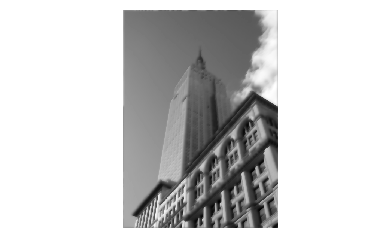

In [30]:
from pylab import *

im = array(Image.open('data/empire.jpg').convert('L'))
U,T = denoise(im,im)
figure()
gray()
imshow(U)
axis('equal')
axis('off')
show()

# 3. Formato Fits (Astronomía)

In [31]:
from astropy.io import fits

red = fits.PrimaryHDU(data=r_data)
red.header['LATOBS'] = "32:11:56" # Añadir random header
red.header['LONGOBS'] = "110:56"
red.writeto('red.fits')

green = fits.PrimaryHDU(data=g_data)
green.header['LATOBS'] = "32:11:56"
green.header['LONGOBS'] = "110:56"
green.writeto('green.fits')

blue = fits.PrimaryHDU(data=b_data)
blue.header['LATOBS'] = "32:11:56"
blue.header['LONGOBS'] = "110:56"
blue.writeto('blue.fits')



In [32]:
#Leyendo header
hdu_list=fits.open('blue.fits')
hdu_list.info()

Filename: blue.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (400, 232)   int64   


In [33]:
header = hdu_list['PRIMARY'].header
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  400                                                  
NAXIS2  =                  232                                                  
EXTEND  =                    T                                                  
LATOBS  = '32:11:56'                                                            
LONGOBS = '110:56  '                                                            

In [34]:
import os
os.remove('red.fits')
os.remove('green.fits')
os.remove('blue.fits')